In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from matplotlib import pyplot as plt

In [2]:
from sklearn.neural_network import MLPRegressor

In [3]:
import pickle

In [4]:
def calculate_smape(actual, predicted) -> float: 
  
    # Convert actual and predicted to numpy 
    # array data type if not already 
    if not all([isinstance(actual, np.ndarray), isinstance(predicted, np.ndarray)]): 
        actual, predicted = np.array(actual), np.array(predicted) 
  
    return round( 
        np.mean( np.abs(predicted - actual) / ((np.abs(predicted) + np.abs(actual))/2) )*100, 2
    ) 

Reading the pickle file with the object that has the normalized data and the scalers.

In [5]:
file_to_read = open("preprocessed_data.pickle", "rb")

pipe = pickle.load(file_to_read)

file_to_read.close()

Fitting a LSTM network to each oil basin time series and evaluating the adjustment 

Reading the pickle file with the object that has the normalized data and the scalers.

In [6]:
%%time
resultados_gs_mlp = {'campo': [],
                     'params': [],
                     'best_score': [],
                      'window_size': []}
for ws in range(1,11):
    for campo in pipe.keys():
        #campo = 'TUPI'
        #Load your dataset or replace it with your data loading code
        X_train, y_train = pipe[campo][0][10:int(pipe[campo][0].shape[0] * 0.8),0:ws] , pipe[campo][0][10:int(pipe[campo][0].shape[0] * 0.8),-1]

        # Define hyperparameters to tune
        param_grid = {
            'hidden_layer_sizes': [(16),(8),(32),(32,32),(8,8),(16,16)] ,
            'activation': ['tanh', 'relu'] ,
            'solver': ['lbfgs', 'adam'] ,
            'max_iter': [100] ,
            'random_state': [42]
        }
        
        # Create the MLP model
        mlp_model = MLPRegressor()

        # Use TimeSeriesSplit for time-series data
        #tscv = TimeSeriesSplit(n_splits=1,test_size=5)
        #train_test_split(y_train, shuffle=False, test_size = 0.1)

        # Perform grid search with cross-validation
        cv = [(slice(None), slice(None))]
        grid = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
        grid_result = grid.fit(X_train, y_train)

        resultados_gs_mlp['campo'].append(campo)
        resultados_gs_mlp['params'].append( grid_result.best_params_ )
        resultados_gs_mlp['best_score'].append( grid_result.best_score_ )
        resultados_gs_mlp['window_size'].append( ws )

        print(f"\n\nCampo {campo} executado!\n\n")


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo BAÚNA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo URUGUÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo MEXILHÃO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo LAPA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo TAMBAÚ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo BÚZIOS executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SÉPIA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo BERBIGÃO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo ITAPU executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo ATAPU executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo MERO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo ATLANTA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo NOROESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo NORDESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SUDOESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SUL DE TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo AnC_TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo TAMBUATÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo BAÚNA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo URUGUÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo MEXILHÃO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status



Campo LAPA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo TAMBAÚ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo BÚZIOS executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SÉPIA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo BERBIGÃO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo ITAPU executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo ATAPU executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo MERO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo ATLANTA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo NOROESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo NORDESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SUDOESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo SUL DE TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo AnC_TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo TAMBUATÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo BAÚNA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo URUGUÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status



Campo SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo MEXILHÃO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status



Campo LAPA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo TAMBAÚ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo BÚZIOS executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo SÉPIA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo BERBIGÃO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo ITAPU executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo ATAPU executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo MERO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo ATLANTA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo NOROESTE DE SAPINHOÁ executado!




C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status

Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo NORDESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo SUDOESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SUL DE TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo AnC_TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo TAMBUATÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo BAÚNA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status



Campo URUGUÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo MEXILHÃO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status



Campo LAPA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo TAMBAÚ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo BÚZIOS executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SÉPIA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo BERBIGÃO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status



Campo ITAPU executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo ATAPU executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo MERO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo ATLANTA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo NOROESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status



Campo NORDESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SUDOESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SUL DE TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo AnC_TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo TAMBUATÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo BAÚNA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo URUGUÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo MEXILHÃO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status



Campo LAPA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo TAMBAÚ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo BÚZIOS executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SÉPIA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo BERBIGÃO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status



Campo ITAPU executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo ATAPU executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo MERO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo ATLANTA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo NOROESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status



Campo NORDESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SUDOESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SUL DE TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status



Campo AnC_TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo TAMBUATÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo BAÚNA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo URUGUÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo MEXILHÃO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status



Campo LAPA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo TAMBAÚ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo BÚZIOS executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SÉPIA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo BERBIGÃO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo ITAPU executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo ATAPU executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo MERO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo ATLANTA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo NOROESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo NORDESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SUDOESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SUL DE TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status



Campo AnC_TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo TAMBUATÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo BAÚNA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo URUGUÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo MEXILHÃO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status



Campo LAPA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo TAMBAÚ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo BÚZIOS executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SÉPIA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo BERBIGÃO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo ITAPU executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo ATAPU executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo MERO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status



Campo ATLANTA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo NOROESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo NORDESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status



Campo SUDOESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SUL DE TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo AnC_TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status



Campo TAMBUATÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo BAÚNA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo URUGUÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo MEXILHÃO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo LAPA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo TAMBAÚ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo BÚZIOS executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SÉPIA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo BERBIGÃO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo ITAPU executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo ATAPU executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo MERO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo ATLANTA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo NOROESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo NORDESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SUDOESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SUL DE TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status



Campo AnC_TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo TAMBUATÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo BAÚNA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo URUGUÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo MEXILHÃO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo LAPA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo TAMBAÚ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo BÚZIOS executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SÉPIA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo BERBIGÃO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo ITAPU executado!




C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo ATAPU executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo MERO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status



Campo ATLANTA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo NOROESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status



Campo NORDESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SUDOESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SUL DE TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo AnC_TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo TAMBUATÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo BAÚNA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo URUGUÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo MEXILHÃO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo LAPA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo TAMBAÚ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo BÚZIOS executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SÉPIA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Campo BERBIGÃO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo ITAPU executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo ATAPU executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status



Campo MERO executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo ATLANTA executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo NOROESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status



Campo NORDESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SUDOESTE DE SAPINHOÁ executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo SUL DE TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo AnC_TUPI executado!


Fitting 1 folds for each of 24 candidates, totalling 24 fits


Campo TAMBUATÁ executado!


CPU times: total: 6.58 s
Wall time: 20.5 s


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [7]:
# Print the best parameters and corresponding MSE
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: -0.0013560869023246957 using {'activation': 'relu', 'hidden_layer_sizes': (16, 16), 'max_iter': 100, 'random_state': 42, 'solver': 'lbfgs'}


In [8]:
results_gs_mlp = pd.DataFrame(resultados_gs_mlp)

In [9]:
results_gs_mlp[results_gs_mlp['campo'] == 'ATAPU']

,campo,params,best_score,window_size
11,ATAPU,"{'activation': 'relu', 'hidden_layer_sizes': (...",-0.001004,1
31,ATAPU,"{'activation': 'relu', 'hidden_layer_sizes': (...",-0.000886,2
51,ATAPU,"{'activation': 'relu', 'hidden_layer_sizes': (...",-0.000713,3
71,ATAPU,"{'activation': 'relu', 'hidden_layer_sizes': (...",-0.000449,4
91,ATAPU,"{'activation': 'relu', 'hidden_layer_sizes': (...",-0.000373,5
111,ATAPU,"{'activation': 'relu', 'hidden_layer_sizes': (...",-0.000443,6
131,ATAPU,"{'activation': 'relu', 'hidden_layer_sizes': (...",-0.000553,7
151,ATAPU,"{'activation': 'relu', 'hidden_layer_sizes': (...",-0.000477,8
171,ATAPU,"{'activation': 'relu', 'hidden_layer_sizes': 3...",-0.000303,9
191,ATAPU,"{'activation': 'relu', 'hidden_layer_sizes': (...",-0.000370,10


In [10]:
results_gs_mlp.to_csv('resultados_grid_search_mlp.csv' , index=False )

In [11]:
results_gs_mlp.sort_values(by='best_score',ascending=False).groupby('campo').first().reset_index()

,campo,params,best_score,window_size
0,ATAPU,"{'activation': 'relu', 'hidden_layer_sizes': 3...",-3.034004e-04,9
1,ATLANTA,"{'activation': 'relu', 'hidden_layer_sizes': (...",-1.094947e-03,10
2,AnC_TUPI,"{'activation': 'relu', 'hidden_layer_sizes': 3...",-4.742821e-04,10
3,BAÚNA,"{'activation': 'relu', 'hidden_layer_sizes': (...",-2.318826e-03,10
4,BERBIGÃO,"{'activation': 'relu', 'hidden_layer_sizes': (...",-1.151026e-03,10
5,BÚZIOS,"{'activation': 'relu', 'hidden_layer_sizes': 3...",-6.450084e-04,9
6,ITAPU,"{'activation': 'relu', 'hidden_layer_sizes': (...",-6.650491e-07,9
7,LAPA,"{'activation': 'relu', 'hidden_layer_sizes': (...",-2.923282e-03,10
8,MERO,"{'activation': 'relu', 'hidden_layer_sizes': (...",-6.774054e-04,10
9,MEXILHÃO,"{'activation': 'relu', 'hidden_layer_sizes': (...",-8.971694e-03,4


In [12]:
results_gs_mlp2 = results_gs_mlp.sort_values(by='best_score',ascending=False).groupby('campo').first().reset_index()

In [13]:
results_gs_mlp2.to_csv('resultados_grid_search_mlp2.csv' , index=False )

---
# Fitting the models with hyperparameters found in grid search

In [14]:
#lag = 10
resultados = {
    'campo':[] ,
    'idx_treino':[] ,
    'idx_teste': [] ,
    'preds': [] ,
    'y_test':[] ,
    'modelo': []
}


for campo in pipe.keys():
    #campo = 'TUPI'
    dict_params = results_gs_mlp2[ results_gs_mlp2['campo'] == campo ]['params'].iloc[0]
    ws = results_gs_mlp2[ results_gs_mlp2['campo'] == campo ]['window_size'].iloc[0]
    '''
    dict_params={
        'hidden_layer_sizes': (8) ,
        'activation': 'tanh' ,
        'solver': 'lbfgs',
        'max_iter': 100 ,
        'random_state': 42
        #'early_stopping': True
    }
    '''

    X_treino = pipe[campo][0][10:,:-1]
    y_treino = pipe[campo][0][10:,-1]

    idx_train = range(0,int(X_treino.shape[0] * 0.8))
    idx_test = range( int(X_treino.shape[0] * 0.8) , X_treino.shape[0])

    #tss = TimeSeriesSplit(n_splits = (int)(X_treino.shape[0] * 0.2), test_size = 1)

    #for idx_train, idx_test in tss.split(X_treino):
    X_train = X_treino[idx_train]
    y_train = y_treino[idx_train]

    # Build the LSTM model
    model = MLPRegressor()
    model.set_params( ** dict_params )

    X_test = X_treino[idx_test]
    y_test = y_treino[idx_test]

    # Train the model
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    resultados['campo'].append(campo)
    resultados['idx_treino'].append(idx_train)
    resultados['idx_teste'].append( idx_test)
    resultados['preds'].append( predictions.reshape(-1) )
    resultados['y_test'].append( y_test.reshape(-1) )
    resultados['modelo'].append( model )


    print(f"Campo: {campo} finalizado!" )

Campo: TUPI finalizado!


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status

Campo: BAÚNA finalizado!
Campo: URUGUÁ finalizado!
Campo: SAPINHOÁ finalizado!
Campo: MEXILHÃO finalizado!
Campo: LAPA finalizado!
Campo: TAMBAÚ finalizado!
Campo: BÚZIOS finalizado!
Campo: SÉPIA finalizado!


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status

Campo: BERBIGÃO finalizado!
Campo: ITAPU finalizado!
Campo: ATAPU finalizado!
Campo: MERO finalizado!
Campo: ATLANTA finalizado!
Campo: NOROESTE DE SAPINHOÁ finalizado!
Campo: NORDESTE DE SAPINHOÁ finalizado!
Campo: SUDOESTE DE SAPINHOÁ finalizado!
Campo: SUL DE TUPI finalizado!
Campo: AnC_TUPI finalizado!
Campo: TAMBUATÁ finalizado!


C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\herli\anaconda3\envs\tf2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [15]:
resultados_mlp_individual = pd.DataFrame(resultados)

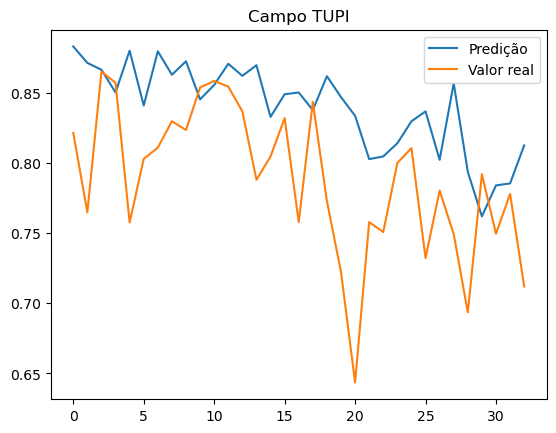

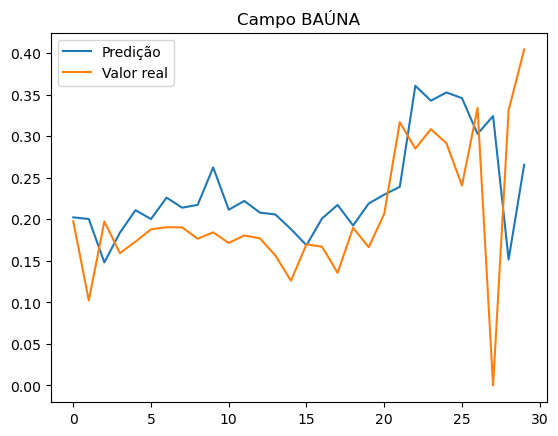

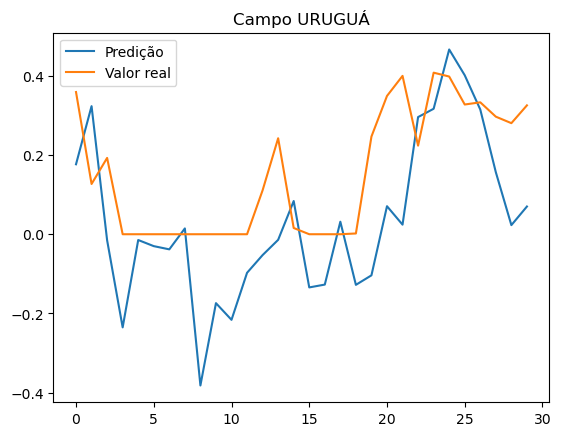

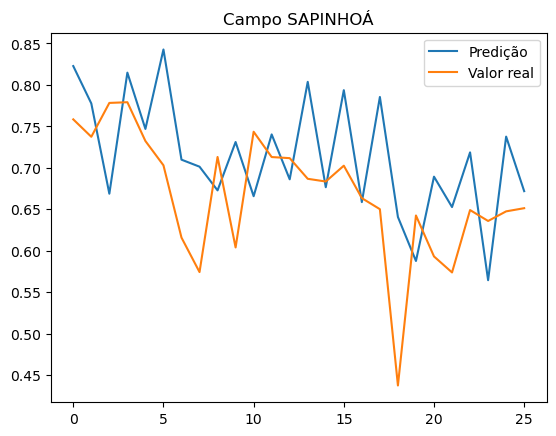

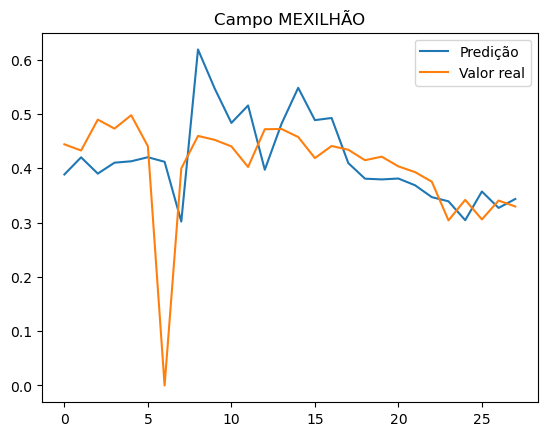

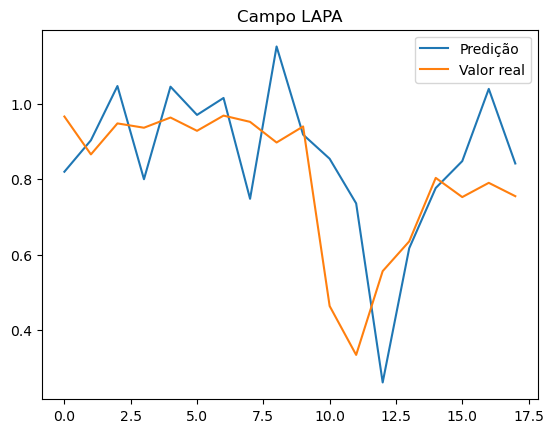

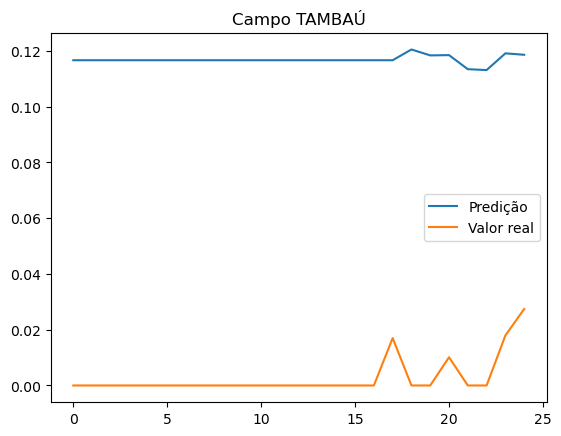

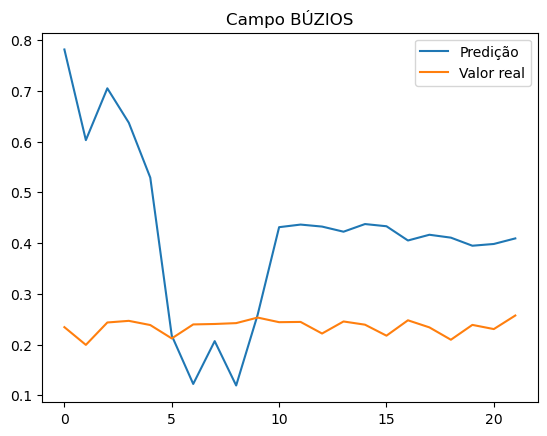

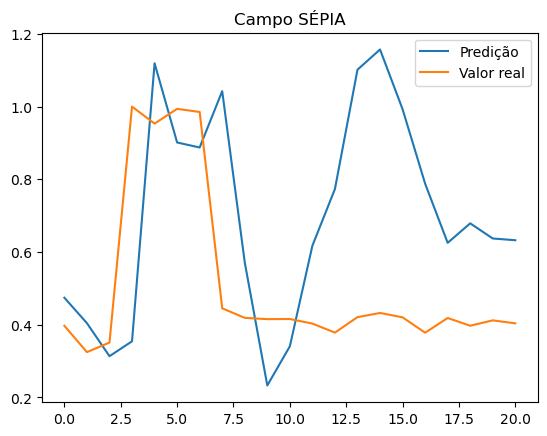

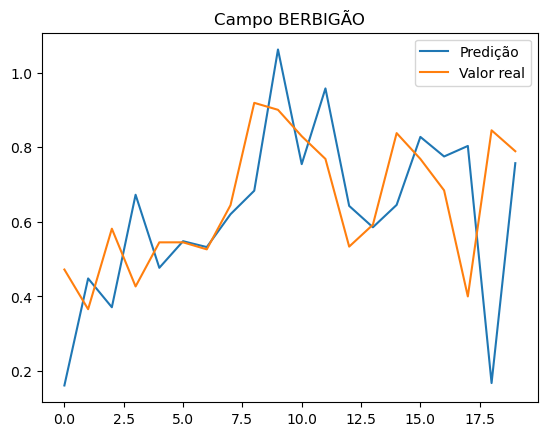

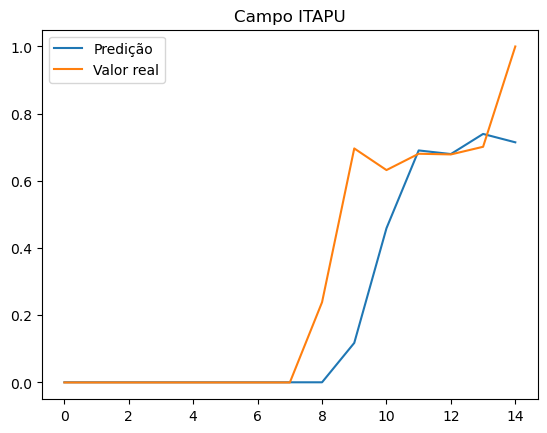

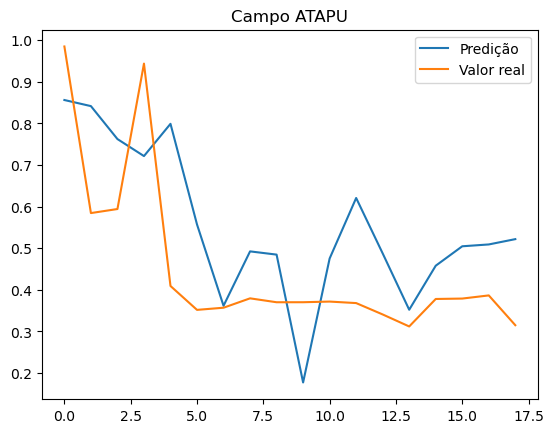

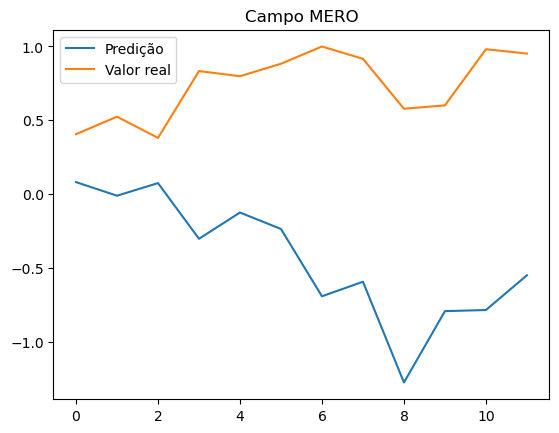

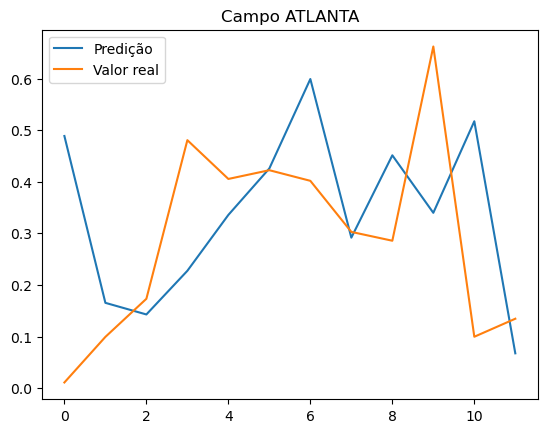

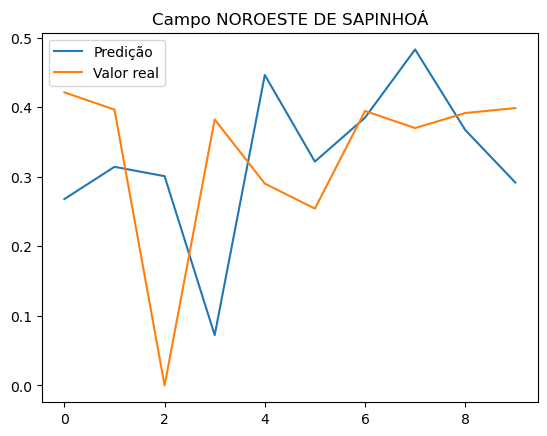

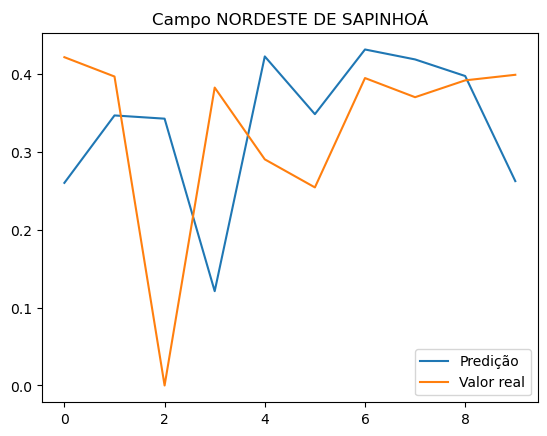

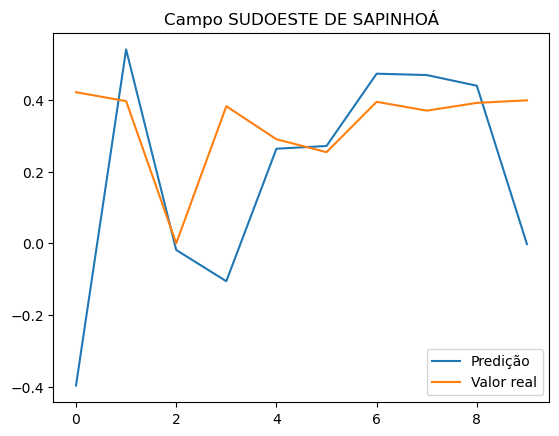

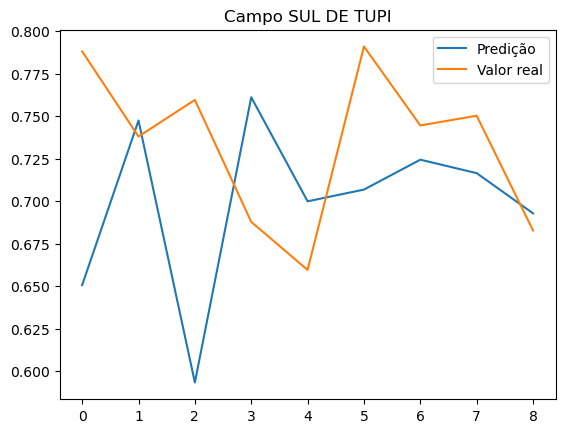

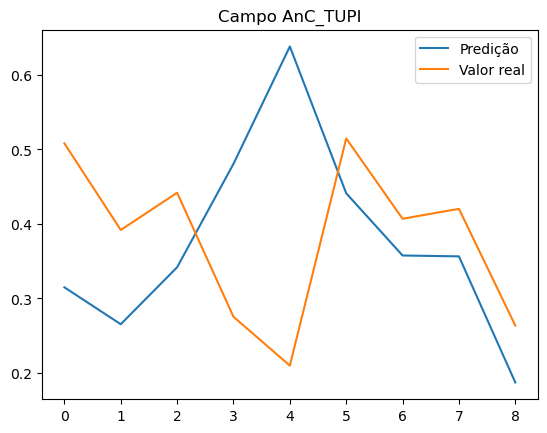

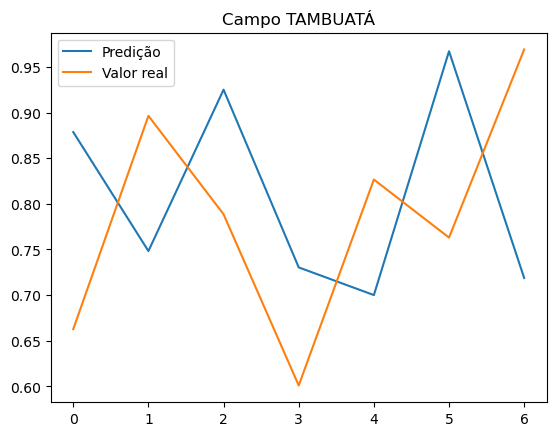

In [16]:
for i in pipe.keys():
    plt.plot(resultados_mlp_individual[resultados_mlp_individual['campo']==i]['preds'].values[0], label='Predição')
    plt.plot(resultados_mlp_individual[resultados_mlp_individual['campo']==i]['y_test'].values[0], label='Valor real')
    plt.legend()
    plt.title('Campo '+str(i) )
    plt.show()

In [17]:
real = np.array([])
predicted = np.array([])
for i in range(0,20):
    real = np.append(real, resultados['y_test'][i][0])
    predicted = np.append(predicted, resultados['preds'][i][0])
print(f"RMSE: {mean_squared_error(real , predicted, squared = False)}")
print(f"MAE: {mean_absolute_error(real, predicted)}" )
print(f"MSE: {mean_squared_error(real , predicted)}")

RMSE: 0.2874827226744648
MAE: 0.20886682097988607
MSE: 0.08264631583632322


In [18]:
resultados_mlp_individual['mse'] = [ mean_squared_error(i[1]['y_test'], i[1]['preds']) for i in resultados_mlp_individual.iterrows()]
resultados_mlp_individual['rmse'] = [ mean_squared_error(i[1]['y_test'], i[1]['preds'],squared=False) for i in resultados_mlp_individual.iterrows()]
resultados_mlp_individual['mae'] = [ mean_absolute_error(i[1]['y_test'], i[1]['preds']) for i in resultados_mlp_individual.iterrows()]

resultados_mlp_individual['mse_1'] = [ mean_squared_error([i[1]['y_test'][0]], [i[1]['preds'][0]]) for i in resultados_mlp_individual.iterrows()]
resultados_mlp_individual['rmse_1'] = [ mean_squared_error([i[1]['y_test'][0]], [i[1]['preds'][0]],squared=False) for i in resultados_mlp_individual.iterrows()]
resultados_mlp_individual['mae_1'] = [ mean_absolute_error([i[1]['y_test'][0]], [i[1]['preds'][0]]) for i in resultados_mlp_individual.iterrows()]

In [19]:
resultados_mlp_individual

,campo,idx_treino,idx_teste,preds,y_test,modelo,mse,rmse,mae,mse_1,rmse_1,mae_1
0,TUPI,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(128, 129, 130, 131, 132, 133, 134, 135, 136, ...","[0.8830007076339482, 0.8712978767557806, 0.866...","[0.8214066534253689, 0.7647913774854848, 0.865...","MLPRegressor(hidden_layer_sizes=(16, 16), max_...",0.005075,0.071237,0.054783,3.793828e-03,0.061594,0.061594
1,BAÚNA,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(120, 121, 122, 123, 124, 125, 126, 127, 128, ...","[0.20235710795746367, 0.20036939469694756, 0.1...","[0.1975508185171136, 0.10235965707566395, 0.19...","MLPRegressor(hidden_layer_sizes=(32, 32), max_...",0.007699,0.087744,0.061740,2.310042e-05,0.004806,0.004806
2,URUGUÁ,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(116, 117, 118, 119, 120, 121, 122, 123, 124, ...","[0.17660621696487974, 0.3233579168250444, -0.0...","[0.3589638811011853, 0.12684957803800515, 0.19...","MLPRegressor(hidden_layer_sizes=(32, 32), max_...",0.035698,0.188938,0.156008,3.325432e-02,0.182358,0.182358
3,SAPINHOÁ,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(100, 101, 102, 103, 104, 105, 106, 107, 108, ...","[0.8227007219695751, 0.7776358003235719, 0.668...","[0.7584455110898232, 0.7374497783545088, 0.778...","MLPRegressor(hidden_layer_sizes=(16, 16), max_...",0.007977,0.089314,0.075463,4.128732e-03,0.064255,0.064255
4,MEXILHÃO,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(109, 110, 111, 112, 113, 114, 115, 116, 117, ...","[0.3884389211416508, 0.4200012419023087, 0.390...","[0.44390206904052504, 0.432519340906554, 0.489...","MLPRegressor(hidden_layer_sizes=(32, 32), max_...",0.010184,0.100915,0.067050,3.076161e-03,0.055463,0.055463
5,LAPA,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 8...","[0.8192899901997055, 0.9026785844291989, 1.046...","[0.9655466459597909, 0.8651958259139064, 0.947...","MLPRegressor(hidden_layer_sizes=(32, 32), max_...",0.036000,0.189737,0.146166,2.139101e-02,0.146257,0.146257
6,TAMBAÚ,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(97, 98, 99, 100, 101, 102, 103, 104, 105, 106...","[0.11662519021535245, 0.11662519021535245, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","MLPRegressor(hidden_layer_sizes=(16, 16), max_...",0.013024,0.114124,0.113930,1.360143e-02,0.116625,0.116625
7,BÚZIOS,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 9...","[0.7813126962629022, 0.6027216534993195, 0.704...","[0.23425834000279713, 0.19933104240630184, 0.2...","MLPRegressor(hidden_layer_sizes=32, max_iter=1...",0.061309,0.247607,0.207921,2.992685e-01,0.547054,0.547054
8,SÉPIA,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 9...","[0.4744109519052381, 0.4044459641522168, 0.313...","[0.39721008887005116, 0.3247225642260197, 0.35...","MLPRegressor(hidden_layer_sizes=(8, 8), max_it...",0.133603,0.365518,0.292482,5.959973e-03,0.077201,0.077201
9,BERBIGÃO,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 9...","[0.1613872006690628, 0.448231661266958, 0.3710...","[0.4721462905503638, 0.3657926517014161, 0.581...","MLPRegressor(hidden_layer_sizes=(32, 32), max_...",0.050983,0.225795,0.159170,9.657121e-02,0.310759,0.310759


In [20]:
resultados_mlp_individual.to_csv('resultados_mlp_individual.csv' , index=False)

In [39]:
lag = 10
resultados = {
    'campo':[] ,
    #'idx_treino':[] ,
    #'idx_teste': [] ,
    'preds': [] ,
    'y_test':[]
}

campo = 'TUPI'
linhas = pipe[campo][0][10:,np.array(range(9,-1,-1))].shape[0]
X_treino = pipe[campo][0][10:int(linhas * 0.8),np.array(range(9,-1,-1))] 
y_treino = pipe[campo][0][10:int(linhas * 0.8),-1]

for i in list(pipe.keys())[1:]:
    linhas = pipe[campo][0][10:,np.array(range(9,-1,-1))].shape[0]
    X_treino = np.concatenate((X_treino, pipe[campo][0][10:int(linhas * 0.8),np.array(range(9,-1,-1))] ) )
    y_treino = np.concatenate((y_treino,pipe[campo][0][10:int(linhas * 0.8),-1]))

    #X_treino = pipe[campo][0][10:,np.array(range(9,-1,-1))]
    #y_treino = pipe[campo][0][10:,-1]

#K.clear_session()

    #tss = TimeSeriesSplit(n_splits = (int)(X_treino.shape[0] * 0.2), test_size = 1)

    #idx_train = range(0,int(X_treino.shape[0] * 0.8))
    #idx_test = range( int(X_treino.shape[0] * 0.8) , X_treino.shape[0])

    #for idx_train, idx_test in tss.split(X_treino):
#X_train = X_treino[idx_train].reshape(-1,10,1)
#y_train = y_treino[idx_train].reshape(-1,1,1)

dict_params={
    'hidden_layer_sizes': (32,32) ,
    'activation': 'tanh' ,
    'solver': 'lbfgs',
    'max_iter': 1000 ,
    'random_state': 42
}

model = MLPRegressor()
model.set_params( ** dict_params )

# Train the model
model.fit(X_treino, y_treino)

for campo in pipe.keys():
    linhas = pipe[campo][0][10:,np.array(range(9,-1,-1))].shape[0]
    X_test = pipe[campo][0][10+int(linhas * 0.8):,np.array(range(9,-1,-1))] 
    y_test = pipe[campo][0][10+int(linhas * 0.8):,-1].reshape(-1,1,1)
    
    #X_test = X_treino[idx_test]
    #y_test = y_treino[idx_test].reshape(-1,1,1)

    predictions = model.predict(X_test)

    resultados['campo'].append(campo)
    #resultados['idx_treino'].append(idx_train)
    #resultados['idx_teste'].append( idx_test)
    resultados['preds'].append( predictions.reshape(-1) )
    resultados['y_test'].append( y_test.reshape(-1) )

    print(f"Campo: {campo} finalizado!" )


Campo: TUPI finalizado!
Campo: BAÚNA finalizado!
Campo: URUGUÁ finalizado!
Campo: SAPINHOÁ finalizado!
Campo: MEXILHÃO finalizado!
Campo: LAPA finalizado!
Campo: TAMBAÚ finalizado!
Campo: BÚZIOS finalizado!
Campo: SÉPIA finalizado!
Campo: BERBIGÃO finalizado!
Campo: ITAPU finalizado!
Campo: ATAPU finalizado!
Campo: MERO finalizado!
Campo: ATLANTA finalizado!
Campo: NOROESTE DE SAPINHOÁ finalizado!
Campo: NORDESTE DE SAPINHOÁ finalizado!
Campo: SUDOESTE DE SAPINHOÁ finalizado!
Campo: SUL DE TUPI finalizado!
Campo: AnC_TUPI finalizado!
Campo: TAMBUATÁ finalizado!


In [40]:
resultados_mlp_empilhado = pd.DataFrame(resultados)

In [37]:
resultados_mlp_empilhado

,campo,preds,y_test
0,TUPI,"[0.8796164777190443, 0.9448588566440148, 0.972...","[1.0, 0.9800634713248145, 0.8487978799108383, ..."
1,BAÚNA,"[0.2695962444491373, 0.27056041759139726, 0.26...","[0.22943686442660638, 0.21174980078042718, 0.2..."
2,URUGUÁ,"[0.4871227268941465, 0.43148683423347994, 0.45...","[0.34988791498492167, 0.29962662331874995, 0.4..."
3,SAPINHOÁ,"[0.8746252517005542, 0.8802221523895728, 0.785...","[0.8104026812901108, 0.8254223745550073, 0.464..."
4,MEXILHÃO,"[0.6380670342931316, 0.6303865194524696, 0.634...","[0.561024245182304, 0.5331676154658561, 0.5495..."
5,LAPA,"[0.7086357658801894, 0.667347267376849, 0.7782...","[0.854837418328039, 0.8687227056088638, 0.9127..."
6,TAMBAÚ,"[0.1203681477768841, 0.11948895556187655, -0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,BÚZIOS,"[0.8980696633415131, 0.7381751604600022, 0.791...","[0.7421939151830711, 0.6412304563215577, 0.836..."
8,SÉPIA,"[0.0014281234838022794, 0.0014281234838022794,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.066..."
9,BERBIGÃO,"[0.9623021809800896, 0.9026902003040442, 0.749...","[0.8519420266798067, 0.6886112838517607, 0.717..."


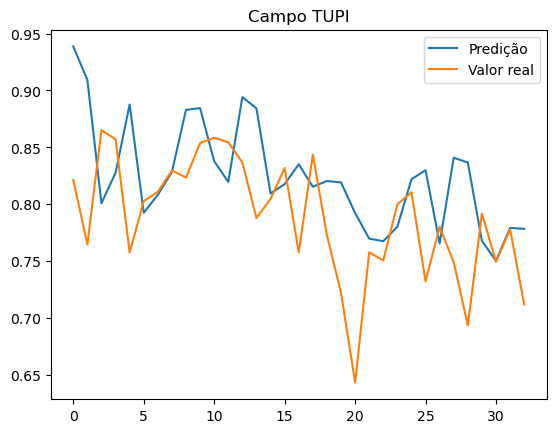

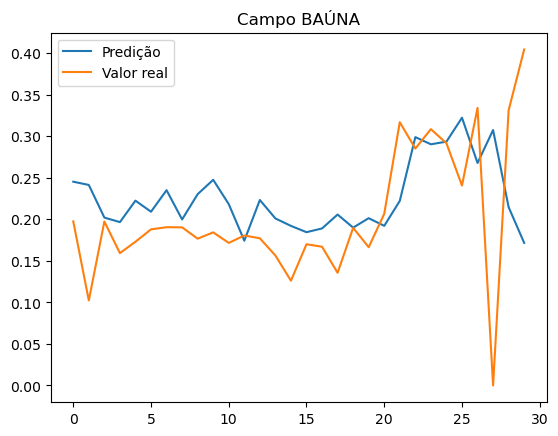

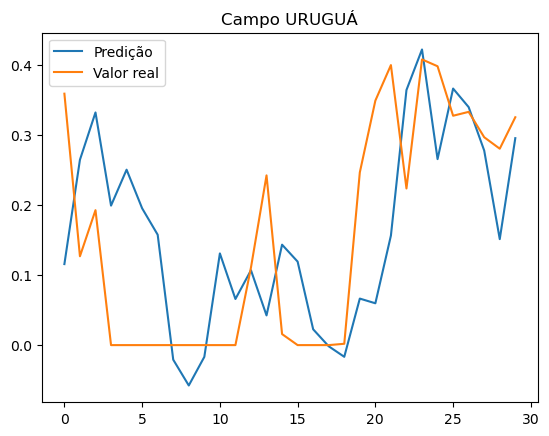

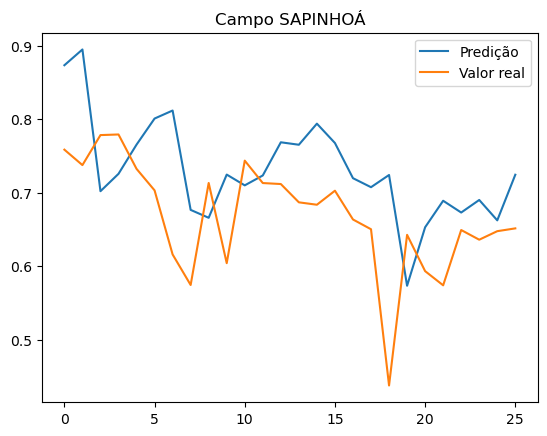

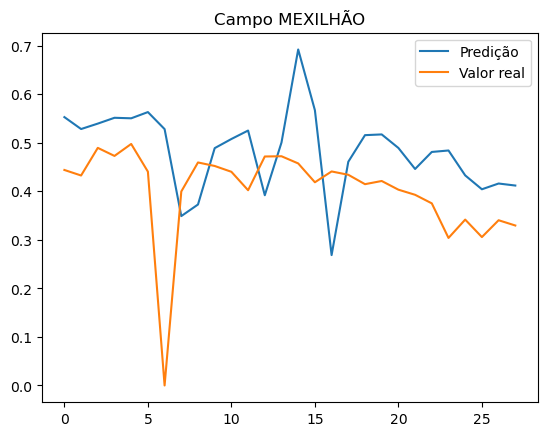

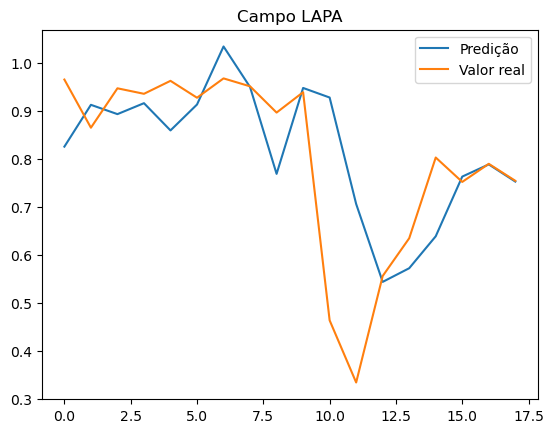

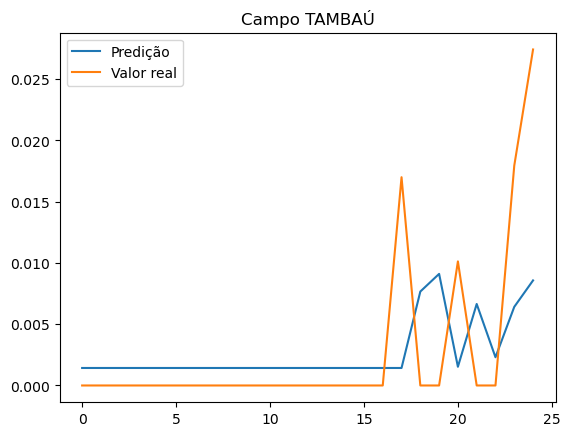

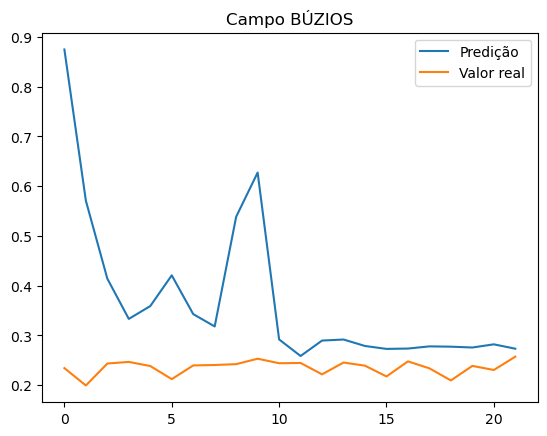

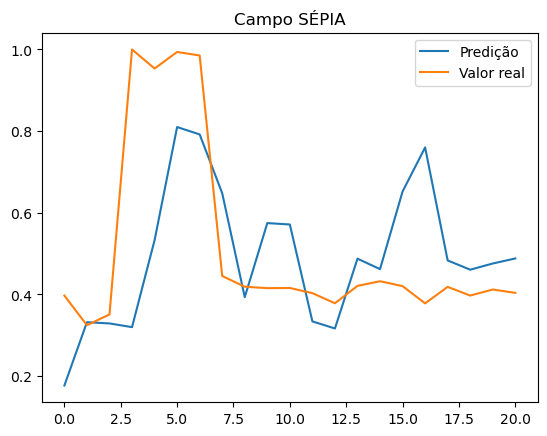

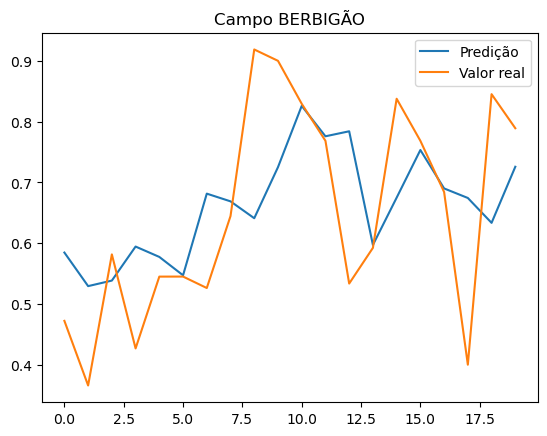

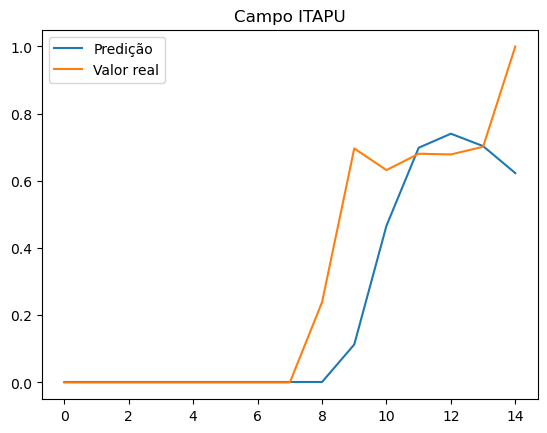

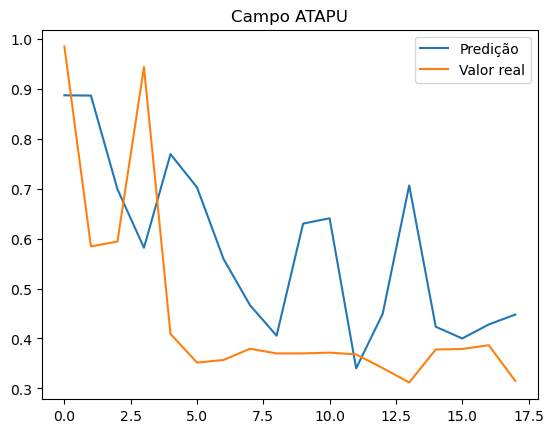

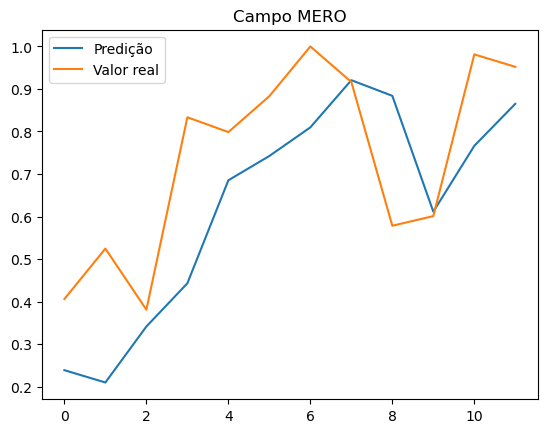

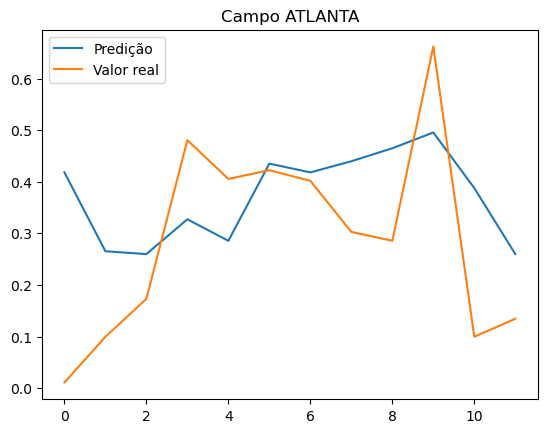

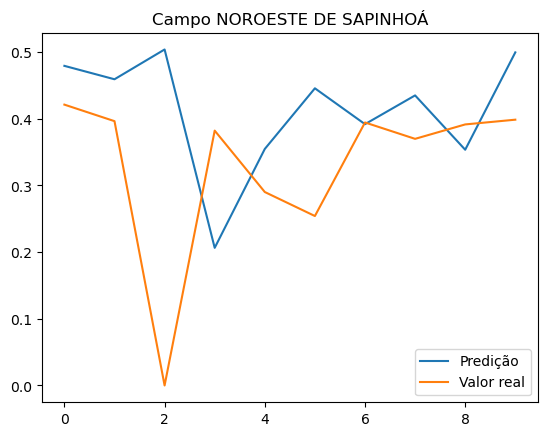

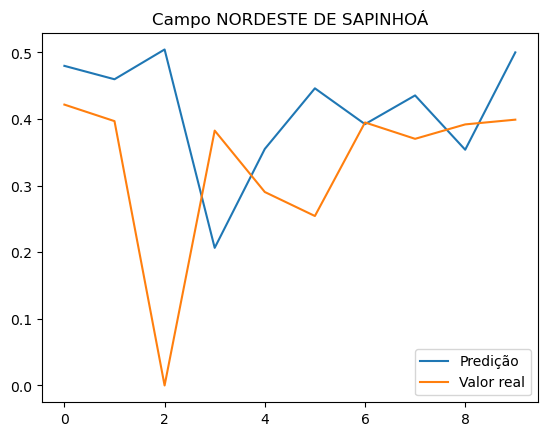

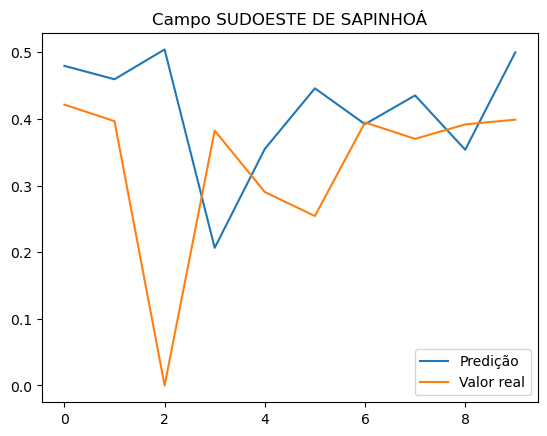

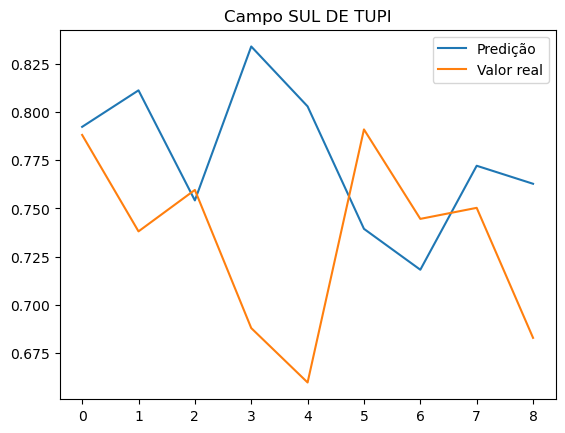

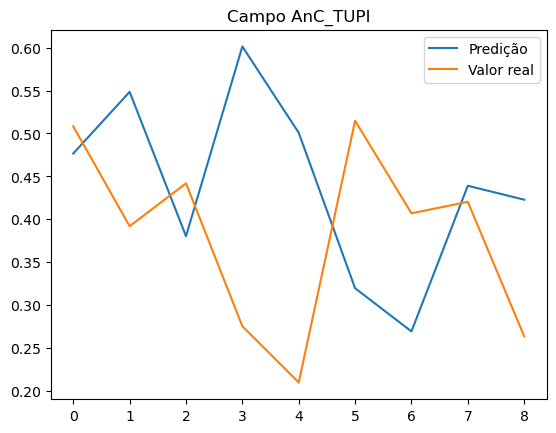

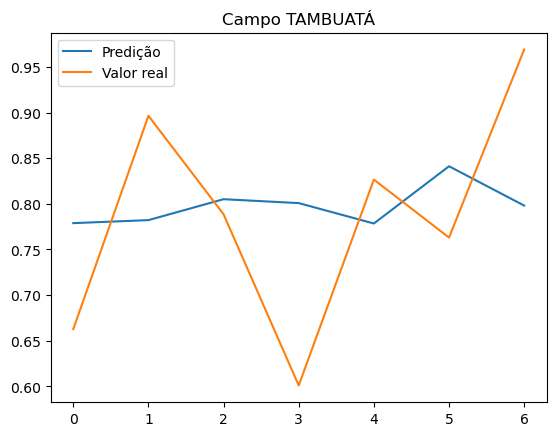

In [41]:
for i in pipe.keys():
    plt.plot(resultados_mlp_empilhado[resultados_mlp_empilhado['campo']==i]['preds'].values[0], label='Predição')
    plt.plot(resultados_mlp_empilhado[resultados_mlp_empilhado['campo']==i]['y_test'].values[0], label='Valor real')
    plt.legend()
    plt.title('Campo '+str(i) )
    plt.show()

In [42]:
real = np.array([])
predicted = np.array([])
for i in range(0,20):
    real = np.append(real, resultados['y_test'][i][0])
    predicted = np.append(predicted, resultados['preds'][i][0])
print(f"RMSE: {mean_squared_error(real , predicted, squared = False)}")
print(f"MAE: {mean_absolute_error(real, predicted)}" )
print(f"MSE: {mean_squared_error(real , predicted)}")

RMSE: 0.20238834214376555
MAE: 0.13731967350531665
MSE: 0.0409610410357019


In [43]:
real = np.array([])
predicted = np.array([])
for i in range(0,20):
    real = np.append(real, resultados['y_test'][i])
    predicted = np.append(predicted, resultados['preds'][i])
print(f"RMSE: {mean_squared_error(real , predicted, squared = False)}")
print(f"MAE: {mean_absolute_error(real, predicted)}" )
print(f"MSE: {mean_squared_error(real , predicted)}")

RMSE: 0.1531555363522173
MAE: 0.10214963139076626
MSE: 0.023456618315335354


In [45]:
resultados_mlp_empilhado['mse'] = [ mean_squared_error(i[1]['y_test'], i[1]['preds']) for i in resultados_mlp_empilhado.iterrows()]
resultados_mlp_empilhado['rmse'] = [ mean_squared_error(i[1]['y_test'], i[1]['preds'],squared=False) for i in resultados_mlp_empilhado.iterrows()]
resultados_mlp_empilhado['mae'] = [ mean_absolute_error(i[1]['y_test'], i[1]['preds']) for i in resultados_mlp_empilhado.iterrows()]

In [46]:
resultados_mlp_empilhado

,campo,preds,y_test,mse,rmse,mae
0,TUPI,"[0.9386093897624472, 0.9093177980804388, 0.800...","[0.8214066534253689, 0.7647913774854848, 0.865...",0.004873,0.069805,0.052030
1,BAÚNA,"[0.24528836943838, 0.2413859851597609, 0.20212...","[0.1975508185171136, 0.10235965707566395, 0.19...",0.007849,0.088595,0.058989
2,URUGUÁ,"[0.11566999318302523, 0.2646204964177443, 0.33...","[0.3589638811011853, 0.12684957803800515, 0.19...",0.019743,0.140509,0.111082
3,SAPINHOÁ,"[0.8733051836037045, 0.8947395210439781, 0.701...","[0.7584455110898232, 0.7374497783545088, 0.778...",0.010339,0.101680,0.083155
4,MEXILHÃO,"[0.5527769327225158, 0.5282262335319181, 0.539...","[0.44390206904052504, 0.432519340906554, 0.489...",0.020568,0.143415,0.109322
5,LAPA,"[0.8257531066088715, 0.9128974753154413, 0.893...","[0.9655466459597909, 0.8651958259139064, 0.947...",0.024551,0.156689,0.092895
6,TAMBAÚ,"[0.0014281234838022794, 0.0014281234838022794,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000041,0.006420,0.004182
7,BÚZIOS,"[0.8746915366629671, 0.5707565248843554, 0.414...","[0.23425834000279713, 0.19933104240630184, 0.2...",0.041478,0.203662,0.134654
8,SÉPIA,"[0.17715490587800214, 0.33211039925187547, 0.3...","[0.39721008887005116, 0.3247225642260197, 0.35...",0.051593,0.227140,0.161281
9,BERBIGÃO,"[0.584595374240173, 0.5293410216984684, 0.5384...","[0.4721462905503638, 0.3657926517014161, 0.581...",0.020842,0.144368,0.107677


In [48]:
resultados_mlp_empilhado.to_csv('resultados_mlp_empilhado.csv' , index = False)

In [ ]:
resultados_mlp_empilhado['mse_1'] = [ mean_squared_error(i[1]['y_test'][0], i[1]['preds'][0]) for i in resultados_mlp_empilhado.iterrows()]
resultados_mlp_empilhado['rmse_1'] = [ mean_squared_error(i[1]['y_test'][0], i[1]['preds'][0],squared=False) for i in resultados_mlp_empilhado.iterrows()]
resultados_mlp_empilhado['mae_1'] = [ mean_absolute_error(i[1]['y_test'][0], i[1]['preds'][0]) for i in resultados_mlp_empilhado.iterrows()]

---
# Calculating evaluation metrics

In [34]:
results = pd.read_csv('resultados_mlp.csv')

In [35]:
mean_squared_error( results['y_test'] , results['preds'] , squared = False)

0.14755169457195216

In [36]:
mean_absolute_error(  results['y_test'] , results['preds'] )

0.09132342851718821

In [37]:
mean_absolute_percentage_error ( results['y_test'] , results['preds'])

65171803268790.11

In [38]:
calculate_smape(results['y_test'] , results['preds'])

46.21